<a href="https://colab.research.google.com/github/tomonari-masada/course2022-intro2ml/blob/main/11_logistic_regression_(in_class).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ロジスティック回帰
* 線形回帰を少し変えれば、２値分類に使うこともできるようになる。
* 線形モデルの出力を、シグモイド関数と呼ばれる関数で$[0,1]$の範囲の値へ変換する。
* 目的変数の値が0のときは、0に近い値が出力されるように、また・・・
* 目的変数の値が1のときは、1に近い値が出力されるように、モデルの学習を行う。

## シグモイド関数
$$ \sigma(s) = \frac{1}{1 + e^{- s}} $$
* 正確には、ロジスティック関数と呼ばれる。
* シグモイド関数のひとつとしてロジスティック関数がある、ということ。だが・・・
* シグモイド関数という呼び名の方が広く流通している感じ。
 * https://en.wikipedia.org/wiki/Sigmoid_function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'retina'

* シグモイド関数の値（縦軸の値）が0から1の範囲に収まっていることを確認してみる。

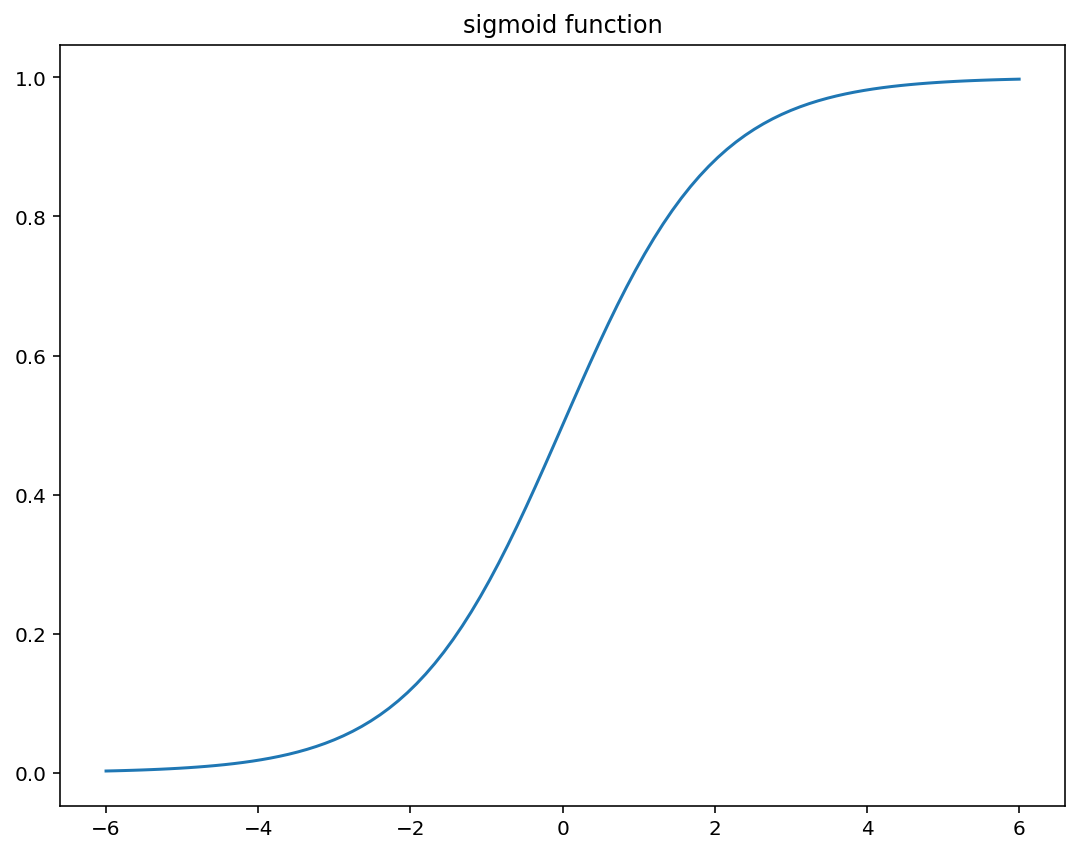

In [2]:
x = np.linspace(-6, 6, 101)
y = 1 / (1 + np.exp( - x))
fig = plt.figure(figsize=(9,7))
plt.plot(x, y)
plt.title('sigmoid function');

## toy dataでロジスティック回帰の使い方を把握

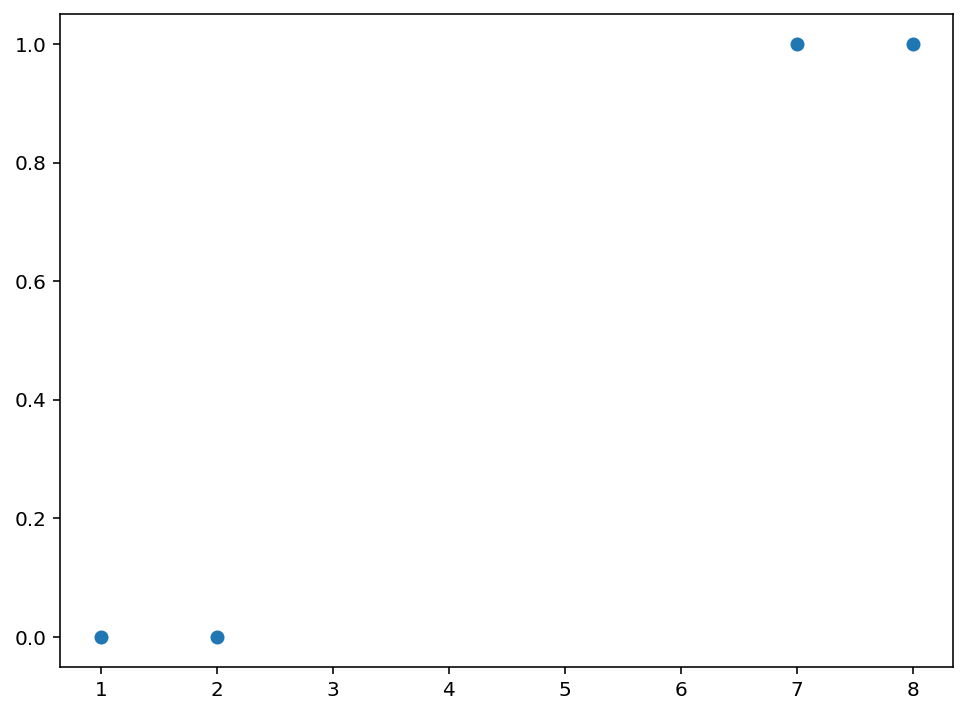

In [5]:
fig = plt.figure(figsize=(8,6))
x = [1, 2, 7, 8]
y = [0, 0, 1, 1]
plt.plot(x, y, 'o');

In [6]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [7]:
clf.fit(x, y)

ValueError: ignored

In [8]:
x = np.array(x).reshape(-1, 1)
print(x)

[[1]
 [2]
 [7]
 [8]]


In [9]:
clf.fit(x, y)

LogisticRegression()

In [10]:
a = clf.coef_
b = clf.intercept_
print(a, b)

[[0.85714952]] [-3.85738729]


* どのような関数が、２値分類を実現する関数として推定されたのか、描いてみる。

予測する関数は$\frac{1}{1 + e^{- (ax + b)}}
=\frac{1}{1 + e^{- (0.857x - 3.857)}}$

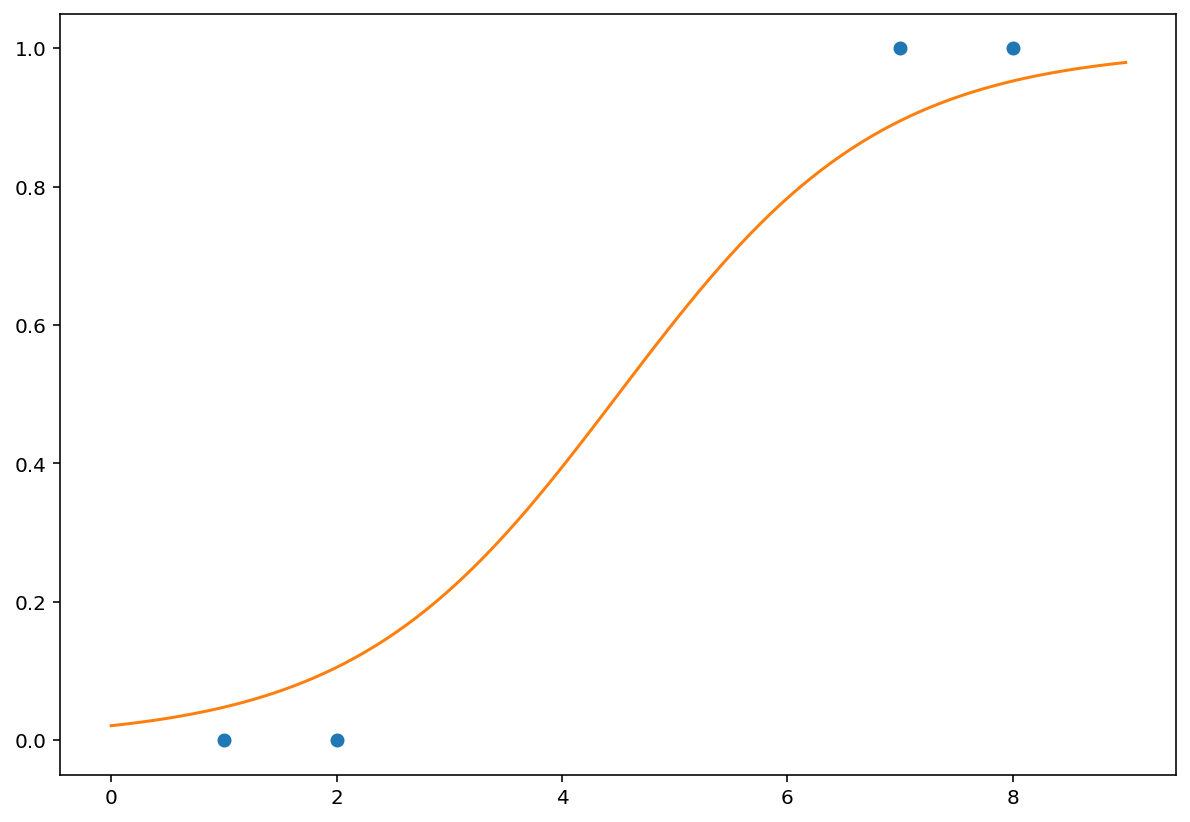

In [12]:
fig = plt.figure(figsize=(10,7))
xs = np.linspace(0,9,101)
ys = clf.predict_proba(xs.reshape(-1,1))
plt.plot(x, y, 'o')
plt.plot(xs, ys[:,1]);

In [19]:
clf.predict_proba([[4.5]])

array([[0.50005361, 0.49994639]])

## 手書き数字画像の分類
* digitsデータセットを使う。
* ただし、digitsデータセットは10値分類なので・・・
* 今回は、0かそうでないかの、2値分類問題を、ロジスティック回帰で解く。

In [20]:
from sklearn.datasets import load_digits
digits = load_digits()

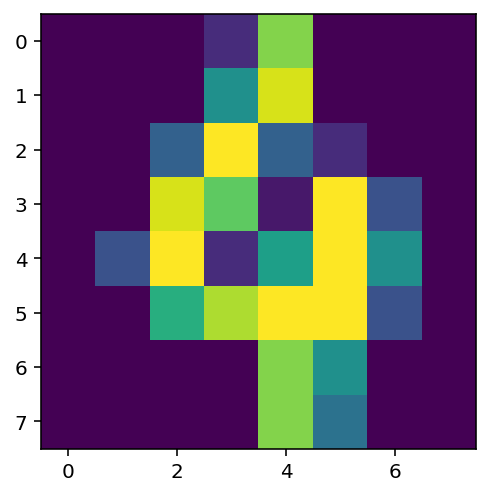

In [27]:
plt.imshow(digits.images[100]);

In [32]:
digits.images[100]

array([[ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  8., 15.,  0.,  0.,  0.],
       [ 0.,  0.,  5., 16.,  5.,  2.,  0.,  0.],
       [ 0.,  0., 15., 12.,  1., 16.,  4.,  0.],
       [ 0.,  4., 16.,  2.,  9., 16.,  8.,  0.],
       [ 0.,  0., 10., 14., 16., 16.,  4.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  8.,  0.,  0.],
       [ 0.,  0.,  0.,  0., 13.,  6.,  0.,  0.]])

In [33]:
digits.data[100]

array([ 0.,  0.,  0.,  2., 13.,  0.,  0.,  0.,  0.,  0.,  0.,  8., 15.,
        0.,  0.,  0.,  0.,  0.,  5., 16.,  5.,  2.,  0.,  0.,  0.,  0.,
       15., 12.,  1., 16.,  4.,  0.,  0.,  4., 16.,  2.,  9., 16.,  8.,
        0.,  0.,  0., 10., 14., 16., 16.,  4.,  0.,  0.,  0.,  0.,  0.,
       13.,  8.,  0.,  0.,  0.,  0.,  0.,  0., 13.,  6.,  0.,  0.])

In [30]:
digits.target.shape

(1797,)

### 訓練データ/検証データ/テストデータに分割

* 下記の分け方は、k-最近傍法のときと同じ。

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(digits.data,
                                                    digits.target, test_size=0.2,
                                                    random_state=42)

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=0.25,
                                                      random_state=42)

print(X_train.shape, X_valid.shape, X_test.shape)

(1077, 64) (360, 64) (360, 64)


### ２値分類の問題へ変えてしまう
* 0であるものは正解ラベルを「0」、そうでないものは全て正解ラベルを「1」にする。

In [35]:
y_train[26]

8

In [39]:
print(list((y_train != 0) * 1))

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 

In [41]:
y_train = (y_train != 0) * 1

In [42]:
print([label for label in y_train])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 

* 検証データとテストデータも同様にラベルを変更する。

In [43]:
y_valid = (y_valid != 0) * 1
y_test = (y_test != 0) * 1

### ロジスティック回帰で２値分類

* ロジスティック回帰の予測の式
 * $i$番目のデータについて、以下の式で、0/1の２値ラベルを予測する。
$$ p_i = \frac{1}{1 + e^{ - ( \beta_0 + \beta_1 x_{i,1} + \cdots + \beta_d x_{i, d} ) }} $$

* 真のラベル$t_i$とのズレを表す式
$$ - \{ t_i \log p_i + ( 1 - t_i ) \log (1 - p_i) \} $$
 * この式の値を全てのデータ点にわたって足し合わせたものを最小化する。

* モデルを準備し、訓練データを渡して係数と切片を推定させる。

In [44]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

* `max_iter`を増やしてみる
 * maximum iterationの略。つまり、最大の繰り返し回数。

In [45]:
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

$f(\mathbf{x}) = a_1 x_1 + a_2 x_2 + \cdots + a_{64} x_{64} + b$

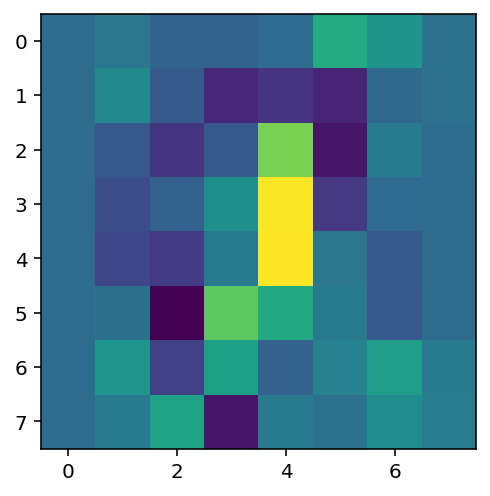

In [49]:
plt.imshow(clf.coef_[0].reshape(8,8));

In [50]:
print(f'Accuracy: {clf.score(X_valid, y_valid):.4f}')

Accuracy: 1.0000


In [54]:
clf.predict([X_valid[10]])

array([0])

In [55]:
y_valid[10]

0

* digitsデータを0とそれ以外の2値分類にしてしまうと、問題として簡単になってしまうらしい・・・。

# 応用：MNISTデータの分類

### データの３分割とEDA

* scikit-learnに用意されている仕組みを利用してMNISTデータをダウンロードする。

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X, y = mnist.data, mnist.target
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


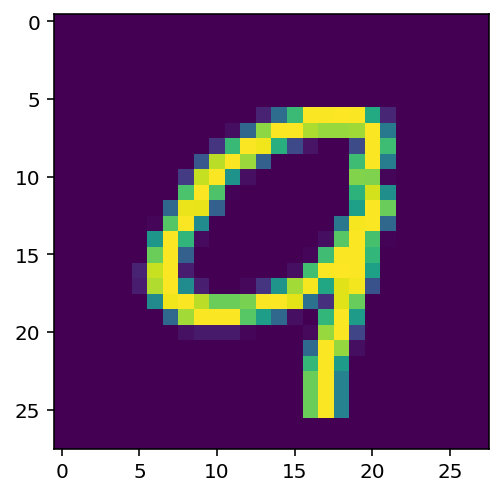

In [3]:
plt.imshow(X.values[3000].reshape(28,28));

In [65]:
y[3000]

'9'

* 通常、MNISTデータは最後の10000件をテストデータとして使う。

In [4]:
X_train, X_test = X[:60000], X[60000:]
y_train, y_test = y[:60000], y[60000:]

* テストデータ以外の60000件を、訓練データ50000件と検証データ10000件へ分割しておく。

In [5]:
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train,
                                                      test_size=10000,
                                                      random_state=42)

In [6]:
print(X_train.shape, X_valid.shape, X_test.shape)

(50000, 784) (10000, 784) (10000, 784)


* 訓練データの最初の100個を可視化してみる。

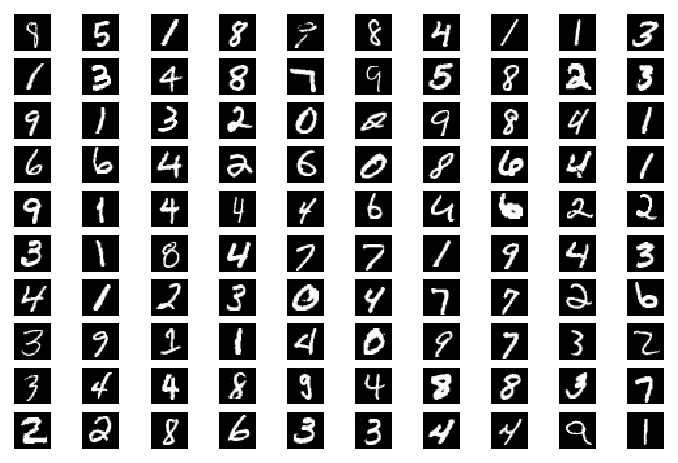

In [70]:
fig, axes = plt.subplots(10, 10)
for x, ax in zip(X_train.values, axes.ravel()):
  ax.axis('off') # 軸を消す
  ax.matshow(x.reshape(28, 28), cmap=plt.cm.gray)
plt.show()

* 問題を２値分類問題に変える。
 * 0とそれ以外の2値分類問題にしてしまう。

In [71]:
y_train = (y_train != '0') * 1
y_valid = (y_valid != '0') * 1
y_test = (y_test != '0') * 1

In [72]:
print(f'{(y_train == 0).sum()} zero digits and {(y_train == 1).sum()} non-zero digits in training set')

4939 zero digits and 45061 non-zero digits in training set


## ロジスティック回帰による分類の実行
* ロジスティック回帰を準備し、訓練データを渡して係数と切片を推定させる。
 * 訓練データの個数が多いので、少し時間がかかる。
 * 推定計算が収束しない場合は、`max_iter`を増やしてみる（デフォルトの設定は`max_iter=100`）。
 * `solver`（最適化アルゴリズムの設定）を`'saga'`にしているのは、こうしないと時間がかかってしまうため。

## ロジスティック回帰での正則化
* scikit-learnのロジスティック回帰では、`C`というパラメータを調整する。
* `C`は、小さいほど、正則化が強く効く＝係数をより強くゼロに近づける。
 * デフォルトの設定は`C=1.0`。
 * リッジ回帰やLassoの`alpha`とは、向きが逆であることに、注意。
* 正則化の種類は`penalty`を`'l2'`か`'l1'`に設定することでおこなう。
 * `l2`だと、係数の二乗の和を最小化する。
 * `l1`だと、係数の絶対値の和を最小化する。

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(penalty='l2', solver='saga')
clf.fit(X_train, y_train)

KeyboardInterrupt: ignored

In [76]:
print(f'Accuracy: {clf.score(X_valid, y_valid):.4f}')

Accuracy: 0.9909


* 推定された係数を可視化してみる。

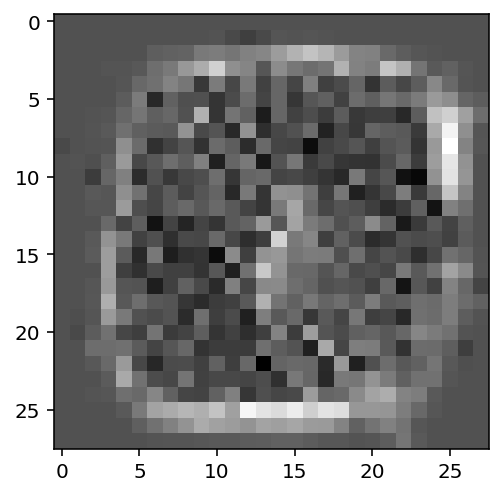

In [79]:
plt.imshow(clf.coef_.reshape(28,28), cmap=plt.cm.gray);

* 引数`C`を増やすと、正則化が弱くなる。
 * `Ridge`や`Lasso`の引数`alpha`は、増やすほど、正則化が強くなった。なので、逆。

In [ ]:
clf = LogisticRegression(penalty='l2', C=0.1, solver='liblinear')
clf.fit(X_train, y_train)
print(f'Accuracy: {clf.score(X_valid, y_valid):.4f}')

In [ ]:
clf = LogisticRegression(penalty='l1', C=0.1, max_iter=500)
clf.fit(X_train, y_train)
print(f'Accuracy: {clf.score(X_valid, y_valid):.4f}')

## 見つけ出した最善の設定を使ってテストデータ上で評価

In [ ]:
clf = LogisticRegression(penalty='l2', C=0.01, solver='saga')
clf.fit(X_train, y_train)
print(f'Accuracy: {clf.score(X_test, y_test):.4f}')